In [1]:
# Fonots

# Ez a kis fostalicska csak arra kell, hogy belenézzek a metric_log-ba

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import warnings 
# warnings.filterwarnings("ignore")

from datetime import datetime, date, time
from pandas.plotting import scatter_matrix

import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2023-05-29 20:23:48
20:23:48


In [2]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,18:08:21,18:08:2,148.92125,60.671375,1,1.6,8.0,84.4,12.1,...,94151.6,886104.8,2048.0,396782.0,100.0,238.0,238.0,239.2,238.0,239.2
1,192.168.0.6,18:08:30,18:08:3,96.57165,57.581700,4,2.0,15.6,75.6,20.7,...,99077.2,893057.2,2048.0,399162.4,100.0,151.7,151.7,159.7,151.1,159.2
2,192.168.0.6,18:08:41,18:08:4,90.46360,49.964909,5,2.2,3.8,94.8,5.0,...,94261.6,888042.0,2048.0,395720.0,100.0,30.2,30.2,29.9,29.7,29.4
3,192.168.0.6,18:08:50,18:08:5,83.88650,45.648350,6,2.0,5.6,92.2,7.4,...,94268.8,888284.4,2048.0,395635.6,100.0,56.8,56.8,56.5,56.8,56.6
4,192.168.0.6,18:09:01,18:09:0,93.75585,55.016958,3,2.4,5.0,92.5,7.3,...,94170.4,888321.2,2048.0,395548.4,100.0,137.4,137.4,137.1,137.4,137.1


In [3]:
df['worker_give_metrics'].unique()

array(['192.168.0.6'], dtype=object)

In [4]:
pd.options.display.float_format = "{:,.2f}".format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
response_time_p95,222.00,253.89,534.82,16.86,79.54,83.97,95.71,"3,279.58"
response_time,222.00,89.38,163.32,15.31,41.41,43.62,47.29,999.07
worker_number,222.00,4.23,2.61,1.00,2.00,4.00,7.00,8.00
request_rate,222.00,32.76,25.74,0.10,9.93,29.20,53.45,79.90
CPU0User%,222.00,23.13,17.11,1.70,8.22,16.95,36.00,57.00
CPU0Idle%,222.00,59.57,31.23,0.10,36.45,71.00,86.42,97.80
CPU0Total%,222.00,40.20,31.35,2.20,12.83,28.90,63.40,99.90
[DSK:sda]Reads,222.00,0.32,2.27,0.00,0.00,0.00,0.00,26.80
[DSK:sda]RMerge,222.00,0.09,1.00,0.00,0.00,0.00,0.00,11.90
[DSK:sda]RKBytes,222.00,4.82,36.91,0.00,0.00,0.00,0.00,470.00


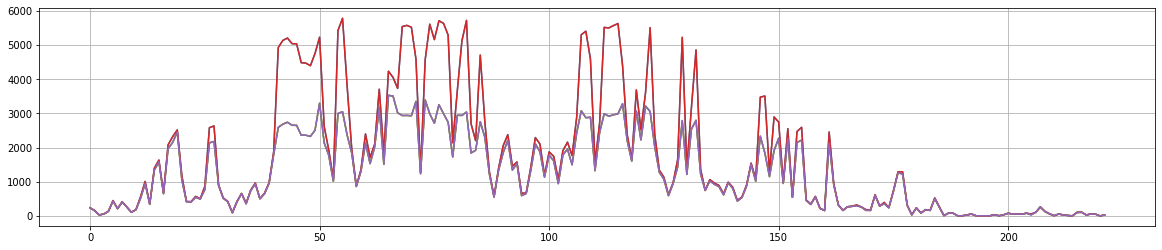

In [5]:
plt.figure(figsize=(20,4))
plt.plot(df['[TCPD]OutRequests'])
plt.plot(df['[TCPD]InDelivers'])
plt.plot(df['[TCPD]InReceives'])
plt.plot(df['[TCPD]OutSegs'])
plt.plot(df['[TCPD]InSegs'])
plt.grid()
plt.show()

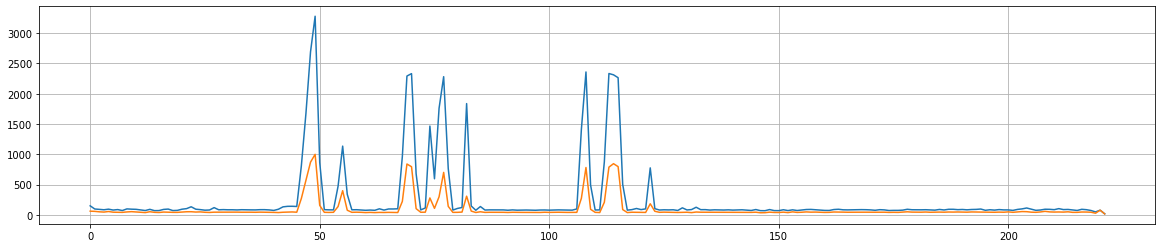

In [6]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.grid()
# plt.grid(axis='y')
plt.show()

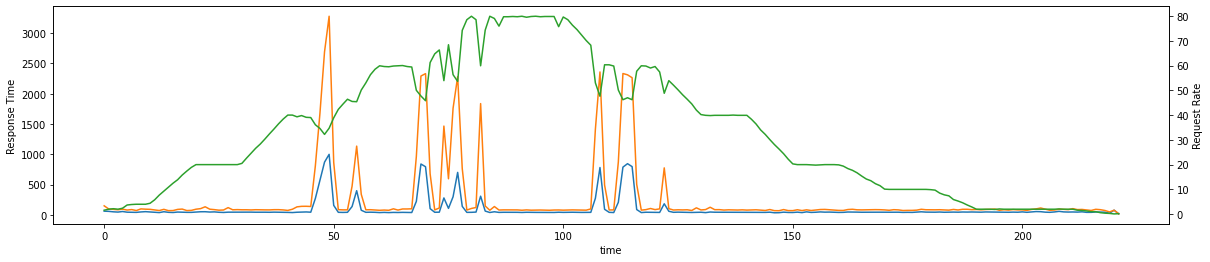

In [7]:
fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], label = 'RT', color = 'C0')
ax1.plot(df['response_time_p95'], label = 'RT95%', color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], label = 'RR', color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

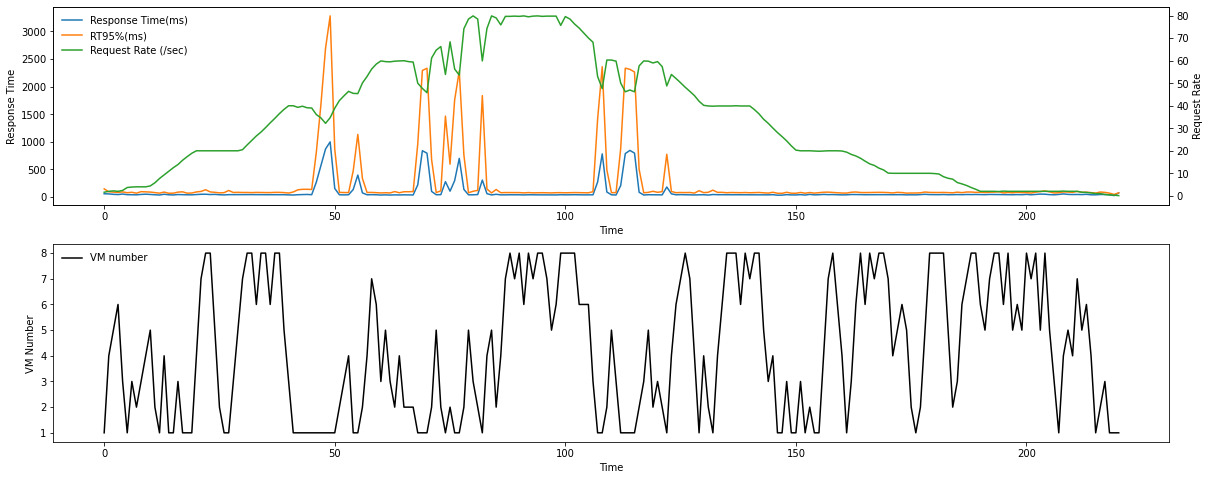

In [8]:
def show(FROM=0, TO=-1):

    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    l1 = ax1.plot(df['response_time'][FROM:TO], color = 'C0', label='Response Time(ms)')
    l2 = ax1.plot(df['response_time_p95'][FROM:TO], color = 'C1', label='RT95%(ms)')

    ax2 = ax1.twinx()

    l3 = ax2.plot(df['request_rate'][FROM:TO], color = 'C2', label='Request Rate (/sec)')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'][FROM:TO], color = 'black', label='VM number')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')
    ax3.legend(loc=2, frameon=False)

    lns = l1+l2+l3
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=2, frameon=False)

    plt.show()

show()

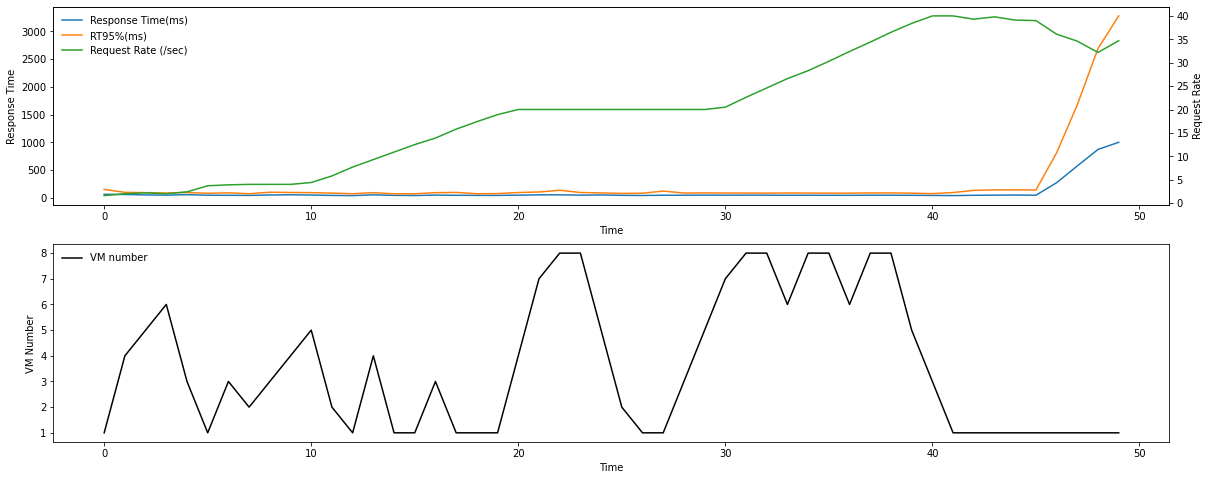

In [9]:
show(0, 50)

In [10]:
df.iloc[:, 0:7].describe()

,response_time_p95,response_time,worker_number,request_rate
count,222.00,222.00,222.00,222.00
mean,253.89,89.38,4.23,32.76
std,534.82,163.32,2.61,25.74
min,16.86,15.31,1.00,0.10
25%,79.54,41.41,2.00,9.93
50%,83.97,43.62,4.00,29.20
75%,95.71,47.29,7.00,53.45
max,"3,279.58",999.07,8.00,79.90


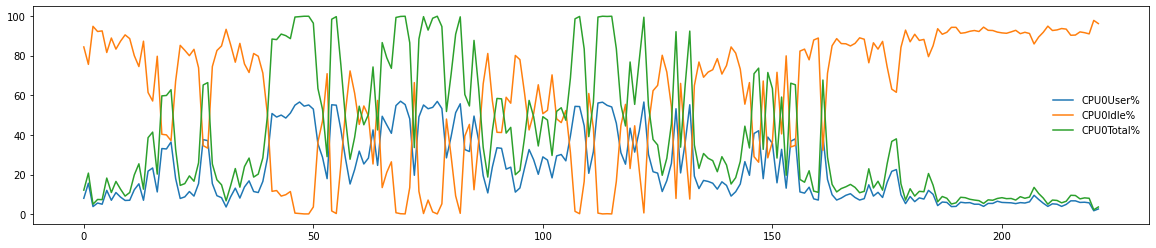

In [11]:
def plot_timeseries_metrics(name: str):

    plt.figure(figsize=(20, 4))

    for col_name in df.columns:
        if name in col_name:
            if df[col_name].describe()[2] > 0:
                plt.plot(df[col_name], label = col_name)

    plt.legend(frameon=False)
    plt.show()

plot_timeseries_metrics('CPU')

In [12]:
df.iloc[:, 7:10].describe()

,CPU0User%,CPU0Idle%,CPU0Total%
count,222.00,222.00,222.00
mean,23.13,59.57,40.20
std,17.11,31.23,31.35
min,1.70,0.10,2.20
25%,8.22,36.45,12.83
50%,16.95,71.00,28.90
75%,36.00,86.42,63.40
max,57.00,97.80,99.90


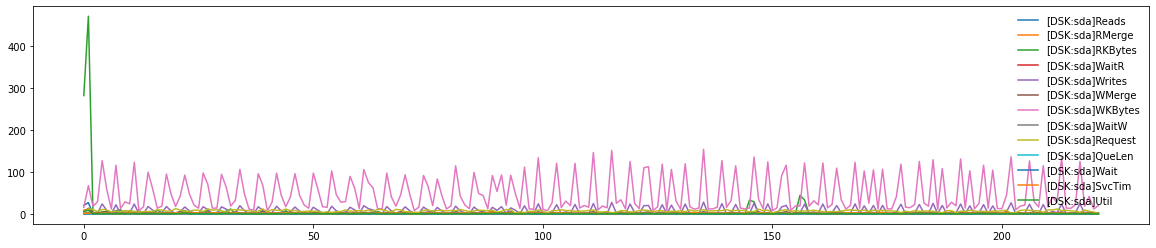

In [13]:
plot_timeseries_metrics('DSK')

In [14]:
df.iloc[:, 10:23].describe()

,[DSK:sda]Reads,[DSK:sda]RMerge,[DSK:sda]RKBytes,[DSK:sda]WaitR,[DSK:sda]Writes,[DSK:sda]WMerge,[DSK:sda]WKBytes,[DSK:sda]WaitW,[DSK:sda]Request,[DSK:sda]QueLen,[DSK:sda]Wait,[DSK:sda]SvcTim,[DSK:sda]Util
count,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00
mean,0.32,0.09,4.82,0.06,7.65,2.80,49.53,0.90,7.10,0.12,0.94,1.59,0.53
std,2.27,1.00,36.91,0.12,8.73,1.23,42.89,0.48,2.17,0.10,0.49,0.67,0.73
min,0.00,0.00,0.00,0.00,0.30,1.10,7.20,0.20,1.00,0.00,0.20,0.00,0.10
25%,0.00,0.00,0.00,0.00,0.60,2.10,14.10,0.70,5.80,0.03,0.70,1.10,0.30
50%,0.00,0.00,0.00,0.00,2.45,2.50,27.40,0.90,7.20,0.10,0.90,1.60,0.40
75%,0.00,0.00,0.00,0.00,16.48,3.10,92.80,1.00,8.57,0.20,1.10,2.00,0.57
max,26.80,11.90,470.00,0.50,28.00,13.50,153.50,5.10,12.60,0.60,5.10,5.60,8.40


In [15]:
df.iloc[:, 23:31].describe()

,[NUMA:0]Used,[NUMA:0]Free,[NUMA:0]Slab,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits
count,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00
mean,"1,921,546.99","113,821.01","147,446.71","96,546.84","917,195.37","2,048.00","396,986.27",100.00
std,"18,760.54","18,760.54","1,542.07","1,284.43","17,329.64",0.00,926.09,0.00
min,"1,878,312.40","94,036.00","144,106.80","93,792.00","886,104.80","2,048.00","395,548.40",100.00
25%,"1,909,188.40","98,725.80","146,711.10","95,659.00","902,376.90","2,048.00","396,264.40",100.00
50%,"1,929,070.60","106,297.40","147,358.20","96,725.40","920,304.40","2,048.00","397,013.20",100.00
75%,"1,936,642.20","126,179.60","148,748.70","97,569.00","934,741.50","2,048.00","397,718.70",100.00
max,"1,941,332.00","157,055.60","149,823.20","99,077.20","936,549.60","2,048.00","399,162.40",100.00


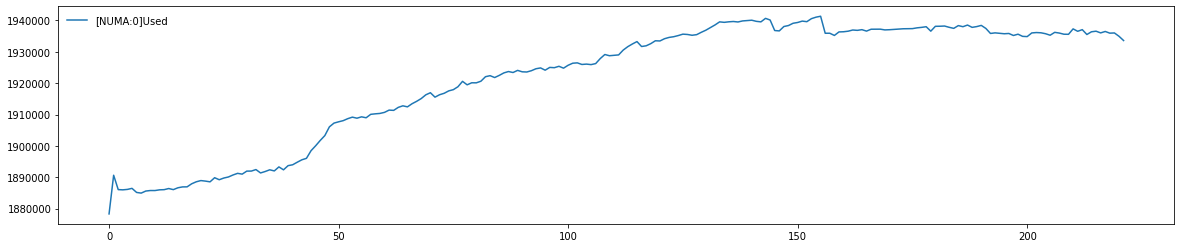

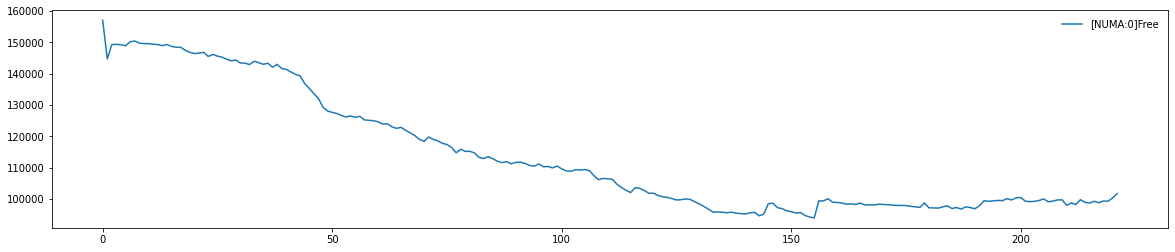

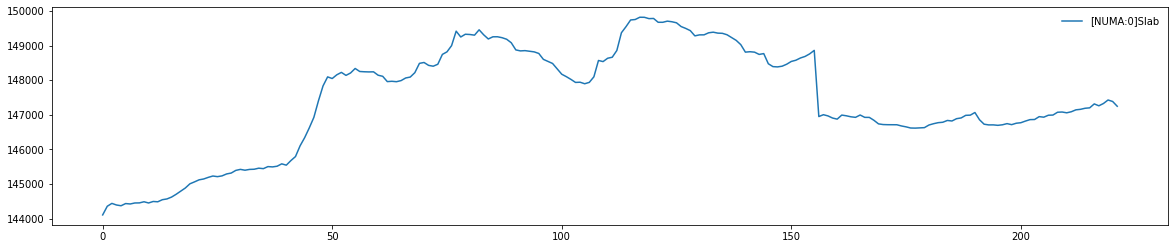

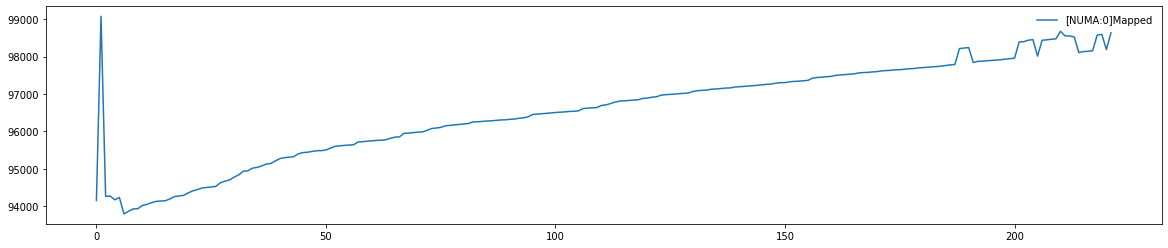

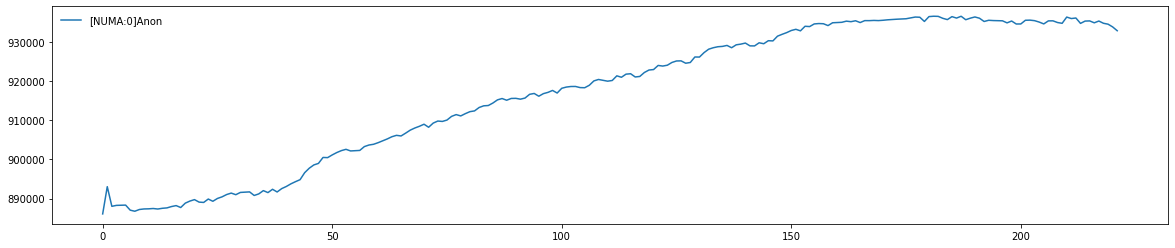

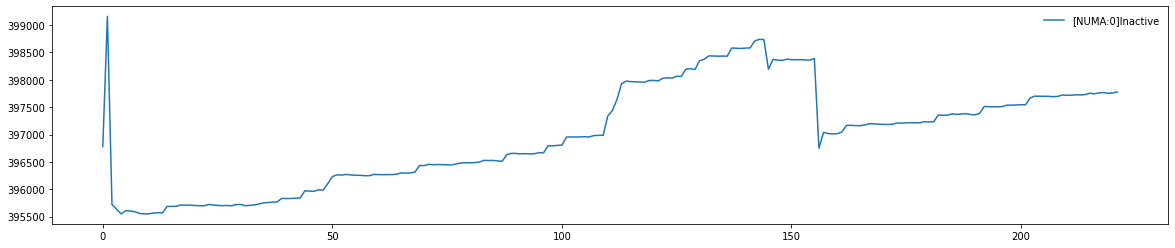

In [16]:
def plot_timeseries_metrics_separate(name: str):

    for col_name in df.columns:
        if name in col_name:
            if df[col_name].describe()[2] > 0:
                plt.figure(figsize=(20, 4))
                plt.ticklabel_format(useOffset=False)
                plt.ticklabel_format(style='plain')
                plt.plot(df[col_name], label = col_name)
                plt.legend(frameon=False)
                plt.show()

plot_timeseries_metrics_separate('NUMA')

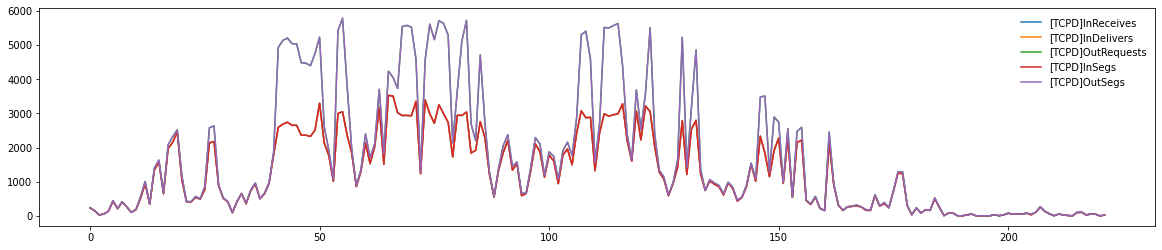

In [17]:
plot_timeseries_metrics('TCP')

## Before metric After metric

Itt állítom elő a metrikából a before after értékeket

Ennek a prototípusát dolgoztam ki és ellenőriztem le itt.

In [18]:
mf = df.copy()

mf['actual_vm_number_is'] = mf['worker_number']
mf['actual_vm_number_was'] = mf['worker_number'].shift(1)
mf['actual_vm_number_will'] = mf['worker_number'].shift(-1)

mf['delta_vm'] = mf['actual_vm_number_will'] - mf['actual_vm_number_is']

mf.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,actual_vm_number_is,actual_vm_number_was,actual_vm_number_will,delta_vm
0,192.168.0.6,18:08:21,18:08:2,148.92,60.67,1,1.60,8.00,84.40,12.10,...,100.00,238.00,238.00,239.20,238.00,239.20,1,NaN,4.00,3.00
1,192.168.0.6,18:08:30,18:08:3,96.57,57.58,4,2.00,15.60,75.60,20.70,...,100.00,151.70,151.70,159.70,151.10,159.20,4,1.00,5.00,1.00
2,192.168.0.6,18:08:41,18:08:4,90.46,49.96,5,2.20,3.80,94.80,5.00,...,100.00,30.20,30.20,29.90,29.70,29.40,5,4.00,6.00,1.00
3,192.168.0.6,18:08:50,18:08:5,83.89,45.65,6,2.00,5.60,92.20,7.40,...,100.00,56.80,56.80,56.50,56.80,56.60,6,5.00,3.00,-3.00
4,192.168.0.6,18:09:01,18:09:0,93.76,55.02,3,2.40,5.00,92.50,7.30,...,100.00,137.40,137.40,137.10,137.40,137.10,3,6.00,1.00,-2.00


In [19]:
mf['delta_vm'].unique()

array([ 3.,  1., -3., -2.,  2., -1.,  0., nan])

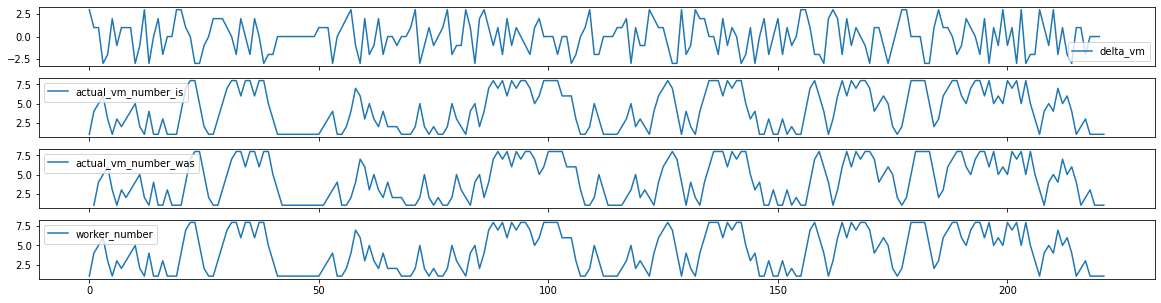

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['delta_vm'], label='delta_vm'); ax1.legend()
ax2.plot(mf['actual_vm_number_is'], label='actual_vm_number_is'); ax2.legend()
ax3.plot(mf['actual_vm_number_was'], label='actual_vm_number_was'); ax3.legend()
ax4.plot(mf['worker_number'], label='worker_number'); ax4.legend()
plt.show()

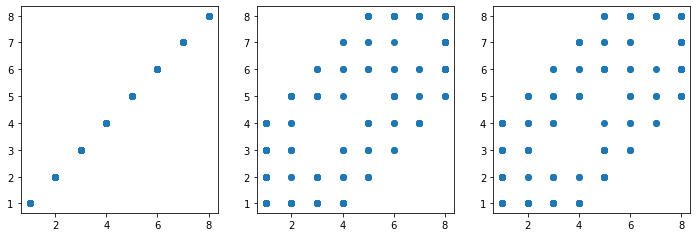

In [21]:
# Ellenőrzés (mert úgy tűnik, hogy a két adatbázisban az éppen aktuális VM szám mindhat egy kicsit mozogna)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 3.8))
ax0.scatter(mf['worker_number'], mf['actual_vm_number_is'])
ax1.scatter(mf['worker_number'], mf['actual_vm_number_was'])
ax2.scatter(mf['worker_number'], mf['actual_vm_number_will'])
plt.show()

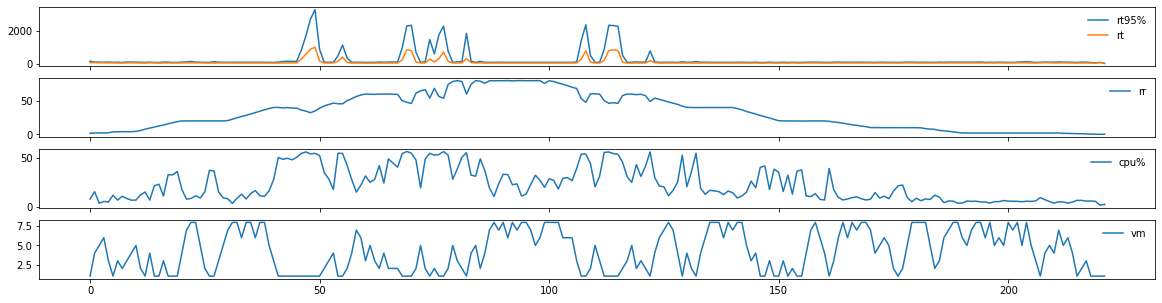

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['response_time_p95'], label='rt95%'); ax1.legend(frameon=False)
ax1.plot(mf['response_time'], label='rt');        ax1.legend(frameon=False)
ax2.plot(mf['request_rate'], label='rr');         ax2.legend(frameon=False)
ax3.plot(mf['CPU0User%'], label='cpu%');          ax3.legend(frameon=False)
ax4.plot(mf['worker_number'], label='vm');        ax4.legend(frameon=False)
plt.show()

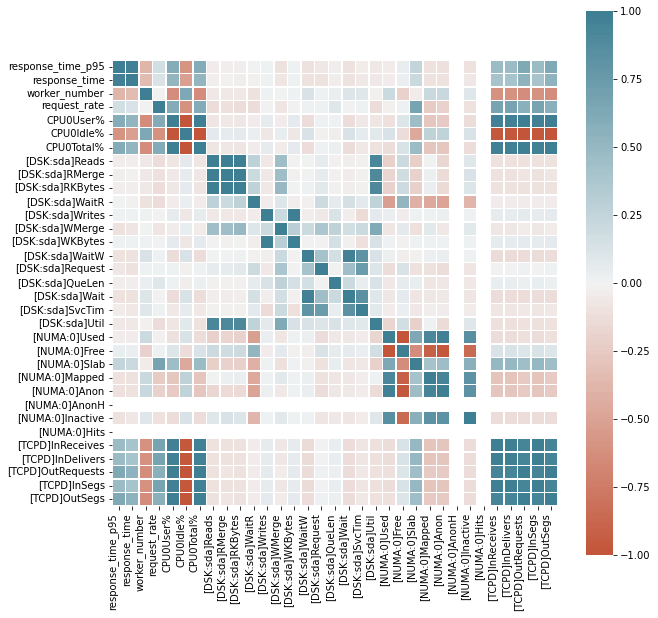

In [23]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=False, linewidths=0.5, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [24]:
input_variables = ['CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', 'request_rate', 'response_time', 'worker_number']

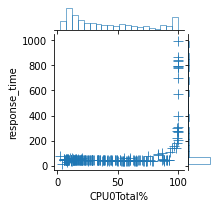

In [25]:
sns.jointplot(
    height=3.0,
    data=df, x='CPU0Total%', y='response_time',
    marker="+", s=100, marginal_kws=dict(bins=20, fill=False),
); plt.show()

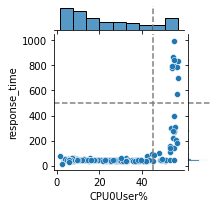

In [26]:
g = sns.JointGrid(data=df, x='CPU0User%', y='response_time', height=3.0)
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=45, y=500); plt.show()

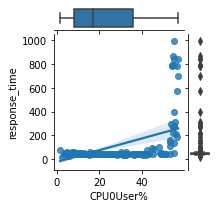

In [27]:
g = sns.JointGrid(data=df, x='CPU0User%', y='response_time', height=3.0)
g.plot(sns.regplot, sns.boxplot); plt.show()

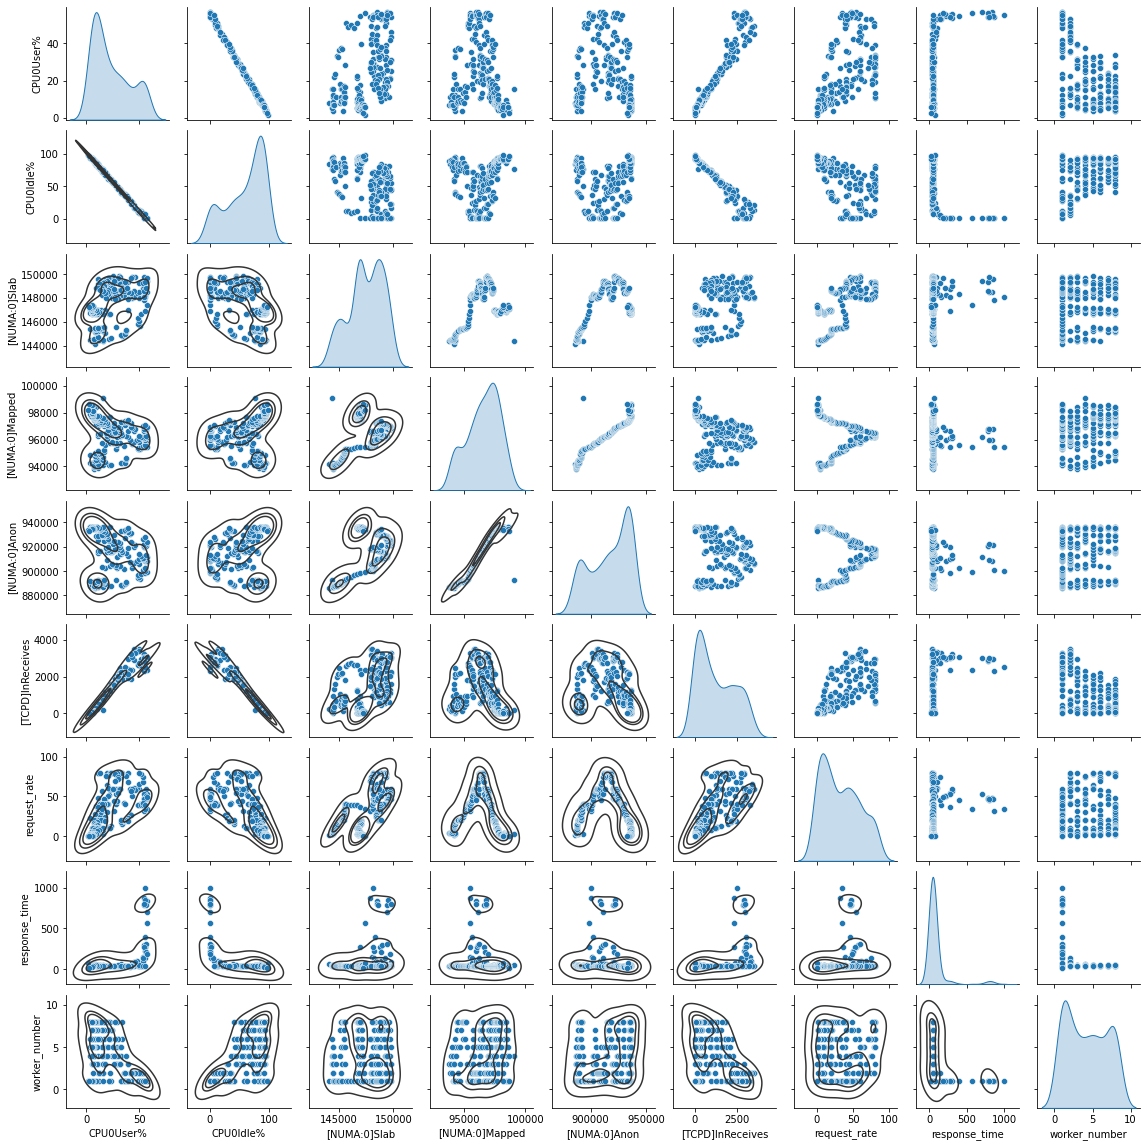

In [28]:
g = sns.pairplot(df[input_variables], diag_kind='kde', height=1.8)
g.map_lower(sns.kdeplot, levels=4, color='.2'); plt.show()

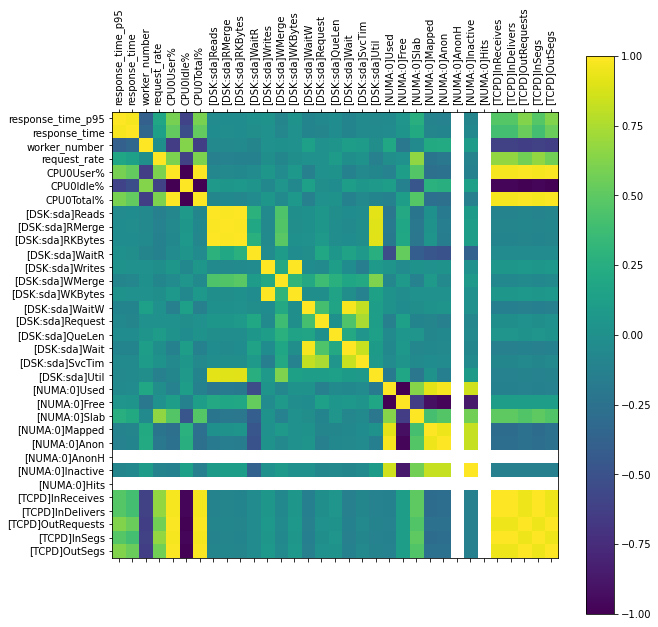

In [29]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
# plt.title('Correlation Matrix', fontsize=16);

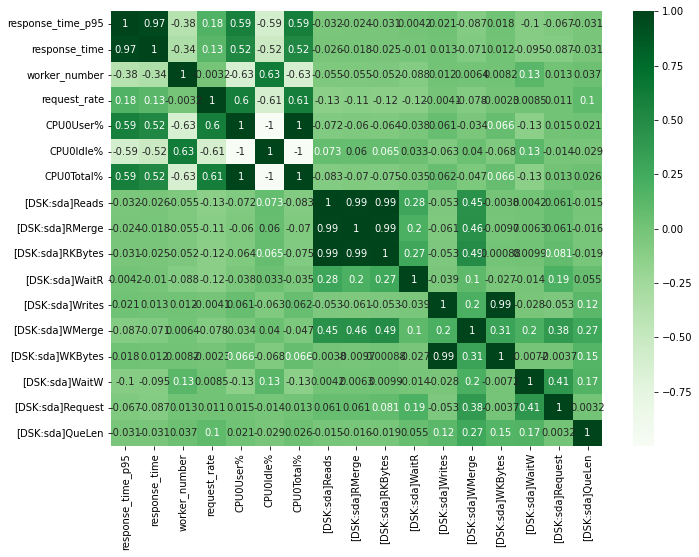

In [30]:
df = df.iloc[:, :20]
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [31]:
df.isnull().values.any()

False

In [32]:
# kibaszni azokat az oszlopokat amelyek értéke konstans

for c in df.select_dtypes(exclude='object').columns:
    std = df[c].std()
    if std == 0:
        df.drop([c], axis=1, inplace=True)
        print(c)

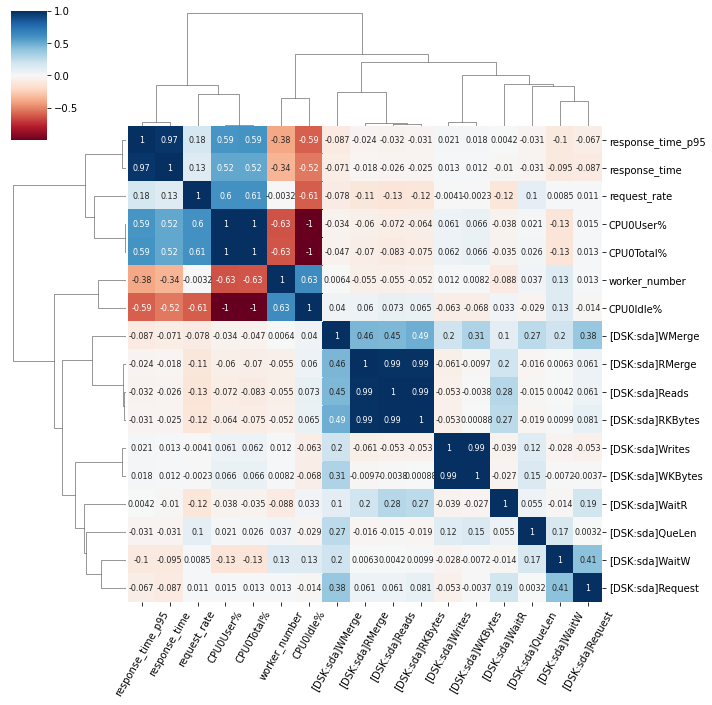

In [33]:
g = sns.clustermap(df.corr(),
                   method = 'complete',
                   cmap   = 'RdBu',
                   annot  = True,
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

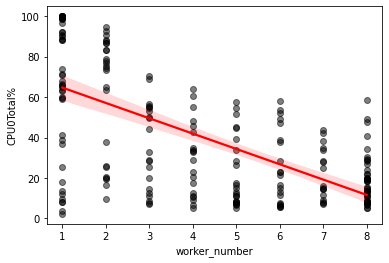

In [34]:
def scatter(x, y, color='black', alpha=0.5, lc='red', ci=95):
    sns.regplot(x=x,
                y=y,
                scatter_kws={
                    'color': color,
                    'alpha': alpha
                },
                line_kws={
                    'color': lc
                },
                ci=95)
    plt.show()

scatter(mf['worker_number'], mf['CPU0Total%'])

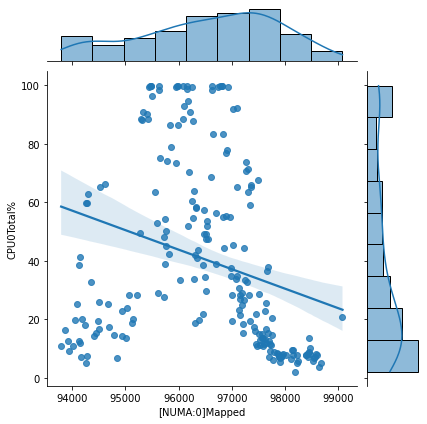

In [35]:
def join(x, y, data):
    sns.jointplot(x=x, y=y, data=data, kind='reg');

join('[NUMA:0]Mapped', 'CPU0Total%', mf)

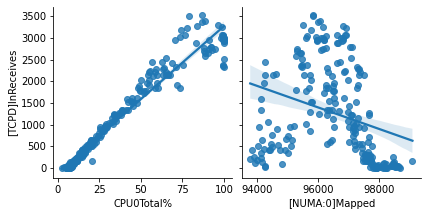

In [36]:
def pair(x_vars, y_vars, data):
    sns.pairplot(data, x_vars=x_vars, y_vars=y_vars,
             height=3, aspect=1.0, kind='reg');

pair(['CPU0Total%', '[NUMA:0]Mapped'], ['[TCPD]InReceives'], mf)

In [37]:

# Itt a vége fuss el véle


In [58]:
# Control the chaos